![FORWARDPROPAG](forward_propagation.png)


![back_propagation.png](back_propagation.png)

![back_propagation.png](back_propag_equations.png)

![](bilan.png)

![](general.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

In [2]:
# Initialisation des paramètres
def initialisation(dimensions):
    ln_dim = len(dimensions)
    parametres = {}
    for i in range(1, ln_dim):
        parametres['W' + str(i)] = np.random.randn(dimensions[i], dimensions[i-1])
        parametres['b' + str(i)] = np.random.randn(dimensions[i], 1)
    return parametres

In [3]:
# Fonction sigmoïde
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def forward_propagation(X, parametres):
    activations = {'A0': X}
    couches = len(parametres) // 2
    for couche in range(1, couches + 1):
        W = parametres['W' + str(couche)]
        B = parametres['b' + str(couche)]
        #activations['A' + str(couche - 1)]=activations['A' + str(couche - 1)].reshape(32, 1, 1)
        Z = W.dot(activations['A' + str(couche - 1)]) + B
        activations['A' + str(couche)] = sigmoid(Z)
    return activations

In [4]:
def LogLoss(A, y):
    m = y.shape[1]  # Nombre d'exemples
    epsilon = 1e-10
    return (-1 / m) * np.sum(y * np.log(A + epsilon) + (1 - y) * np.log(1 - A + epsilon))

In [5]:
# Prédiction
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    C = len(parametres) // 2
    Af = activations['A' + str(C)]
    return Af[0] >= 0.5 #because after , for the images application , af will be multi dimensional , and we will need a sahpe of(1000,) while we getting(1000,64)

In [6]:
# Mise à jour des paramètres
def update(gradients, parametres, learning_rate):
    couches = len(parametres) // 2
    for couche in range(1, couches + 1):
        parametres['W' + str(couche)] -= learning_rate * gradients['dW' + str(couche)]
        parametres['b' + str(couche)] -= learning_rate * gradients['db' + str(couche)]
    return parametres

In [7]:
# Rétropropagation
def back_propagation(y, parametres, activations):
    m = y.shape[1]
    C = len(parametres) // 2
    dZ = activations['A' + str(C)] - y
    gradients = {}
    for c in reversed(range(1, C + 1)):
        gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
        gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        if c > 1:
            dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])
    return gradients

In [8]:
# Entraînement du réseau de neurones
def reseau_de_neurone(X, y, hidden_layers=(32,32,32), learning_rate=0.1, nb_diteration=1000):
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)
    training_history = np.zeros((int(nb_diteration), 2))
    C = len(parametres) // 2

    for i in range(nb_diteration):
        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]
        training_history[i, 0] = LogLoss(Af, y)  # Correction ici
        y_pred = predict(X, parametres)
        training_history[i, 1] = accuracy_score(y.flatten(), y_pred.flatten())

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 1], label='train acc')
    plt.legend()
    plt.show()
    return parametres

In [9]:
# Tracé de la frontière de décision
def plot_decision_boundary(parametres, X, y, resolution=100):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))

    grid = np.c_[xx.ravel(), yy.ravel()].T
    activations = forward_propagation(grid, parametres)
    Z = activations['A' + str(len(parametres) // 2)]
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=['#FF0000', '#00FF00'])
    plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black')
    plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Frontière de Décision')
    plt.show()

dim X : (2, 100)
dim y : (1, 100)


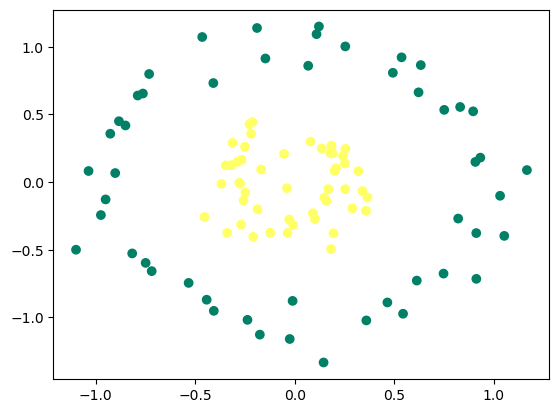

In [10]:
#generer un Dataset:
number_of_arguments = 100
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3 , random_state=0)#random state is the seed generating random numbers , with same seed we got same dataset
X=X.T
y=y.reshape((1,y.shape[0]))
print(f"dim X : {X.shape}")
print(f"dim y : {y.shape}")
#colors = [i for i in range(100)]
plt.scatter(X[0,:],X[1,:],c=y,cmap='summer')#if y[i]=c((X[i,0],X[i,1]))=0 it will be displayed in yellow , random state=69 will generate a dataset 'indescernable' ,no good , choose the seed well for a classification problem  
plt.show()

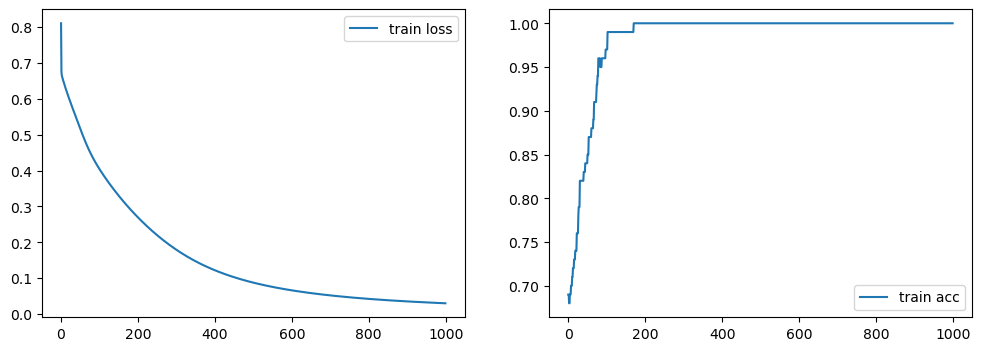

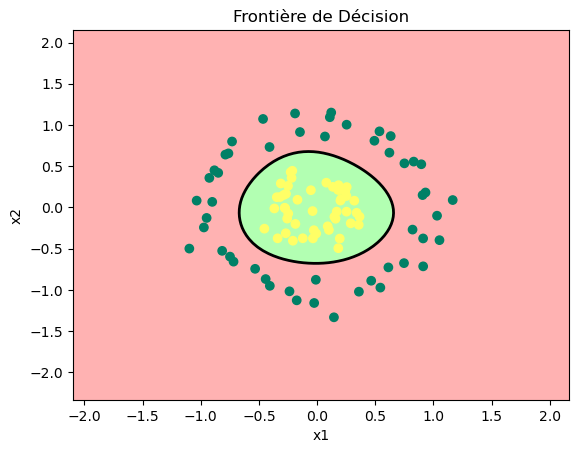

In [11]:
# Entraîner le modèle et tracer la frontière de décision
parametres = reseau_de_neurone(X, y)
plot_decision_boundary(parametres, X, y)



(16, 16, 16) spécifie un réseau de neurones avec trois couches cachées #hiden_layers, chacune ayant 16 neurones. Cela signifie que le réseau aura une architecture plus complexe avec trois couches de transformations non linéaires.

(16,) spécifie un réseau de neurones avec une seule couche cachée #hiden_layers qui a 16 neurones. Cela signifie que le réseau aura une architecture plus simple avec une seule couche de transformation non linéaire.

Resultats en augmentant le nb de couches :

![results](resultats.png)

# CHAT VS CHIEN

In [12]:
from utilities import *


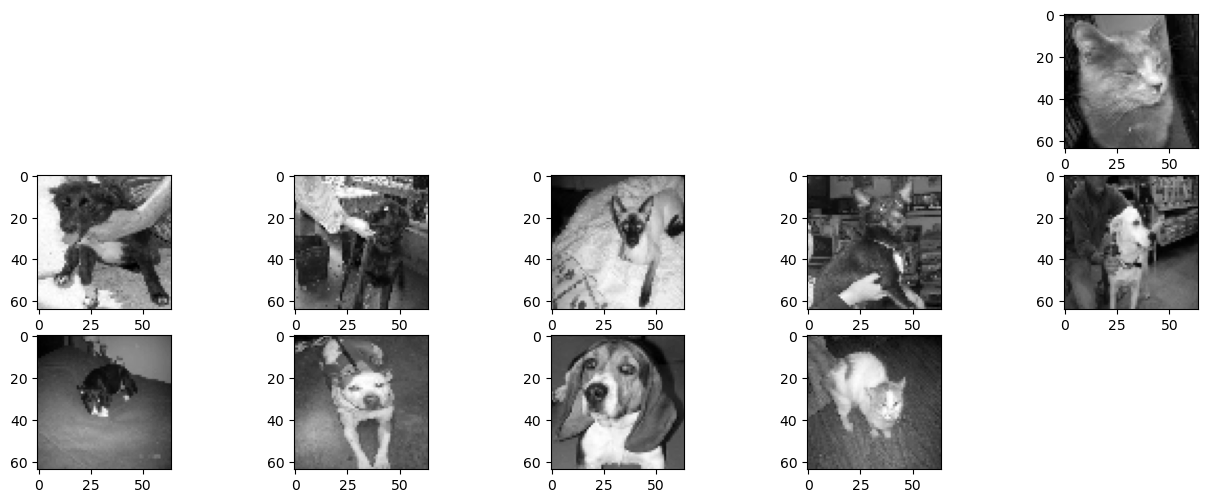

In [13]:
X_train,y_train,X_test,y_test=load_data()
plt.figure(figsize=(16,8))
for i in range(10,20):
    plt.subplot(4,5,i)
    plt.imshow(X_train[i],cmap='gray')
    plt.tight_layout
plt.show()

In [14]:
y_test=y_test.T
y_train=y_train.T
X_test=X_test.T
X_train=X_train.T

X_train_reshaped=X_train.reshape(-1,X_train.shape[-1])/X_train.max()
X_test_reshaped=X_test.reshape(-1,X_test.shape[-1])/X_test.max()

print(X_train_reshaped.shape)
print(X_test_reshaped.shape)
print(y_train.shape)
print(y_test.shape)


(4096, 1000)
(4096, 200)
(1, 1000)
(1, 200)


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
def reseau_de_neurone2(X_train, y_train,X_test,y_test, hidden_layers=(64,64,64), learning_rate=0.1, nb_diteration=1000):
    dimensions = list(hidden_layers)
    dimensions.insert(0, X_train.shape[0])
    dimensions.append(y_train.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)
    training_history = np.zeros((int(nb_diteration), 2))
    #test
    test_history = np.zeros((int(nb_diteration), 2))
    C = len(parametres) // 2

    for i in range(nb_diteration):
        #train
        activations_train = forward_propagation(X_train, parametres)
        gradients = back_propagation(y_train, parametres, activations_train)
        Af = activations_train['A' + str(C)]
        training_history[i, 0] = LogLoss(Af, y_train)  
        y_pred = predict(X_train, parametres)
        training_history[i, 1] = accuracy_score(y_train.flatten(), y_pred.flatten())

        
        #test
        activations_test=forward_propagation(X_test,parametres)
        Af_test=activations_test['A' + str(C)]
        test_history[i,0]=LogLoss(Af_test,y_test)
        y_pred=predict(X_test,parametres)
        test_history[i,1]=accuracy_score(y_test.flatten(),y_pred.flatten())


        parametres = update(gradients, parametres, learning_rate)

    average_training_accuracy = np.sum(training_history[:, 1]) / len(training_history)
    print("training_accuracy", average_training_accuracy)

    average_test_accuracy = np.sum(test_history[:, 1]) / len(test_history)
    print("test_accuracy", average_test_accuracy)

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.plot(training_history[:, 0], label='Train Loss')
    plt.legend()
    plt.subplot(2, 2, 2)
    plt.plot(training_history[:, 1], label='Train Accuracy')
    plt.legend()
    plt.subplot(2, 2, 3)
    plt.plot(test_history[:, 0], label='Test Loss')
    plt.legend()
    plt.subplot(2, 2, 4)
    plt.plot(test_history[:, 1], label='Test Accuracy')
    plt.legend()
    plt.show()
    return parametres

training_accuracy 0.710142
test_accuracy 0.548825


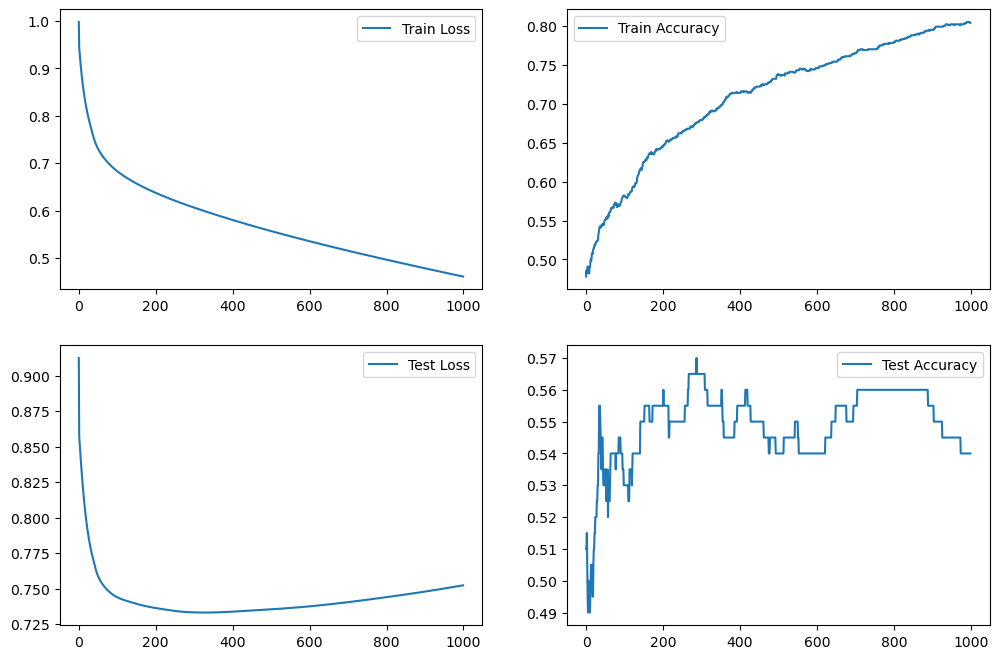

In [17]:
parametres1=reseau_de_neurone2(X_train_reshaped,y_train,X_test_reshaped,y_test)

il y a toujours le problème de over fitting :(  :( 

during the test loss , the cost function "rebondit"
